*Image Binary Classification using CNN*

Reference: https://towardsdatascience.com/pytorch-vision-binary-image-classification-d9a227705cf9

In [1]:
import torch
from torchvision import transforms, datasets

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: ", device)

Device:  cuda


In [2]:
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

new_dataset = datasets.ImageFolder(root='./datasets/chihuahua-vs-muffin', transform=image_transforms)

new_dataset

Dataset ImageFolder
    Number of datapoints: 4733
    Root location: ./chihuahua-vs-muffin
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [3]:
idx2class = {v: k for k, v in new_dataset.class_to_idx.items()}
idx2class

{0: 'chihuahua', 1: 'muffin'}

In [8]:
import numpy as np
from torch.utils.data import DataLoader, SubsetRandomSampler

new_dataset_size = len(new_dataset)
new_dataset_size_indices = list(range(new_dataset_size))
np.random.shuffle(new_dataset_size_indices)
val_split_index = int(np.floor(0.2 * new_dataset_size))  # 80% train, 20% validation
# train_idx, val_idx = new_dataset_size_indices[val_split_index:], new_dataset_size_indices[:val_split_index]
train_idx, val_idx = new_dataset_size_indices[:300], new_dataset_size_indices[300:400]
train_loader = DataLoader(dataset=new_dataset, shuffle=False, batch_size=8, sampler=SubsetRandomSampler(train_idx))
val_loader = DataLoader(dataset=new_dataset, shuffle=False, batch_size=1, sampler=SubsetRandomSampler(val_idx))

(torch.Size([8, 3, 128, 128]),
 tensor([0, 1, 0, 1, 0, 0, 0, 0]),
 torch.Size([3, 128, 128]))

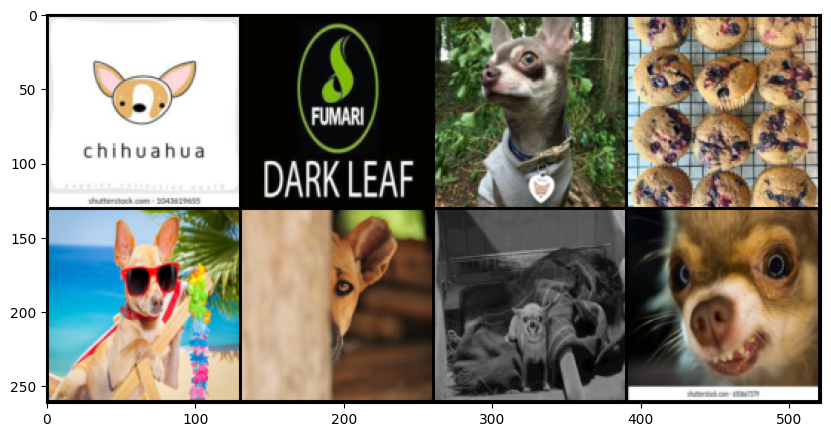

In [9]:
import matplotlib.pyplot as plt
from torchvision import utils

single_batch = next(iter(train_loader))
single_image = single_batch[0][0]
# plt.imshow(single_image.permute(1, 2, 0))  # single image
single_batch_grid = utils.make_grid(single_batch[0], nrow=4)
plt.figure(figsize = (10,10))
plt.imshow(single_batch_grid.permute(1, 2, 0))
single_batch[0].shape, single_batch[1], single_image.shape

In [11]:
import torch.nn as nn
import torch.optim as optim
from binaryclassifier import BinaryClassifier
from train import train

model = BinaryClassifier()
model.to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

accuracy_stats, loss_stats = train(model, device, train_loader, val_loader, criterion, optimizer, epoch=20)

BinaryClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv4): Conv2d(64, 2, kernel_size=(32, 32), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


  5%|▌         | 1/20 [00:20<06:31, 20.58s/it]

Epoch 1: | Train Loss: 13.66818 | Val Loss: 1.76730 | Train Acc: 48.711| Val Acc: 71.000


 10%|█         | 2/20 [00:36<05:16, 17.61s/it]

Epoch 2: | Train Loss: 2.92181 | Val Loss: 2.50933 | Train Acc: 64.684| Val Acc: 66.000


 15%|█▌        | 3/20 [00:52<04:46, 16.85s/it]

Epoch 3: | Train Loss: 3.56050 | Val Loss: 1.41424 | Train Acc: 70.974| Val Acc: 82.000


 20%|██        | 4/20 [01:08<04:29, 16.87s/it]

Epoch 4: | Train Loss: 2.73159 | Val Loss: 10.32662 | Train Acc: 72.789| Val Acc: 44.000


 25%|██▌       | 5/20 [01:24<04:06, 16.44s/it]

Epoch 5: | Train Loss: 1.41465 | Val Loss: 1.99010 | Train Acc: 82.026| Val Acc: 67.000


 30%|███       | 6/20 [01:45<04:12, 18.05s/it]

Epoch 6: | Train Loss: 0.96084 | Val Loss: 1.53586 | Train Acc: 83.658| Val Acc: 84.000


 35%|███▌      | 7/20 [02:03<03:51, 17.79s/it]

Epoch 7: | Train Loss: 0.65026 | Val Loss: 2.99952 | Train Acc: 90.342| Val Acc: 72.000


 40%|████      | 8/20 [02:23<03:42, 18.58s/it]

Epoch 8: | Train Loss: 0.78946 | Val Loss: 1.75306 | Train Acc: 87.658| Val Acc: 84.000


 45%|████▌     | 9/20 [02:39<03:16, 17.87s/it]

Epoch 9: | Train Loss: 0.98067 | Val Loss: 3.37852 | Train Acc: 89.184| Val Acc: 71.000


 50%|█████     | 10/20 [02:56<02:56, 17.67s/it]

Epoch 10: | Train Loss: 0.83276 | Val Loss: 3.93604 | Train Acc: 87.684| Val Acc: 56.000


 55%|█████▌    | 11/20 [03:14<02:38, 17.64s/it]

Epoch 11: | Train Loss: 1.82122 | Val Loss: 3.80341 | Train Acc: 84.579| Val Acc: 76.000


 60%|██████    | 12/20 [03:34<02:27, 18.44s/it]

Epoch 12: | Train Loss: 3.31876 | Val Loss: 5.43458 | Train Acc: 81.316| Val Acc: 80.000


 65%|██████▌   | 13/20 [03:53<02:08, 18.42s/it]

Epoch 13: | Train Loss: 1.42686 | Val Loss: 2.81669 | Train Acc: 89.947| Val Acc: 77.000


 70%|███████   | 14/20 [04:10<01:48, 18.13s/it]

Epoch 14: | Train Loss: 0.79423 | Val Loss: 5.21294 | Train Acc: 91.632| Val Acc: 70.000


 75%|███████▌  | 15/20 [04:27<01:29, 17.88s/it]

Epoch 15: | Train Loss: 1.42564 | Val Loss: 2.48489 | Train Acc: 86.947| Val Acc: 80.000


 80%|████████  | 16/20 [04:45<01:11, 17.96s/it]

Epoch 16: | Train Loss: 0.65493 | Val Loss: 2.42565 | Train Acc: 92.526| Val Acc: 81.000


 85%|████████▌ | 17/20 [05:01<00:51, 17.30s/it]

Epoch 17: | Train Loss: 0.21334 | Val Loss: 7.03231 | Train Acc: 96.842| Val Acc: 67.000


 90%|█████████ | 18/20 [05:19<00:34, 17.40s/it]

Epoch 18: | Train Loss: 0.52940 | Val Loss: 2.49201 | Train Acc: 94.868| Val Acc: 78.000


 95%|█████████▌| 19/20 [05:38<00:18, 18.03s/it]

Epoch 19: | Train Loss: 0.50542 | Val Loss: 2.17241 | Train Acc: 92.895| Val Acc: 79.000


100%|██████████| 20/20 [05:57<00:00, 17.88s/it]

Epoch 20: | Train Loss: 0.25460 | Val Loss: 6.34064 | Train Acc: 95.184| Val Acc: 69.000


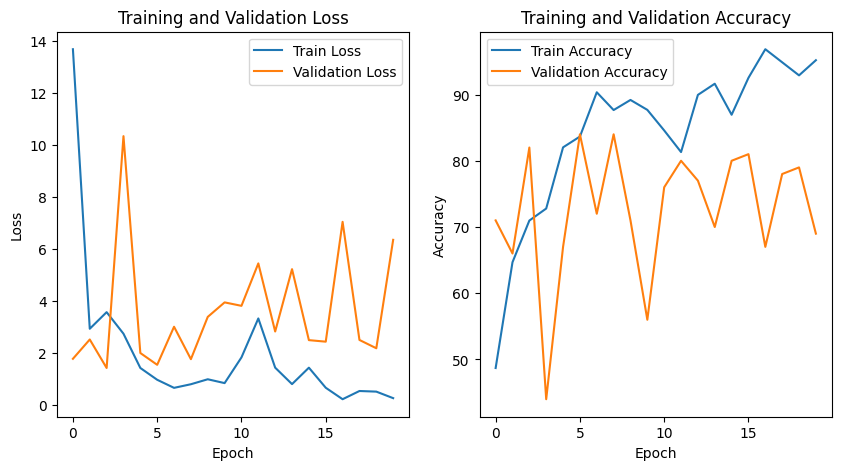

In [13]:
# Loss and Accuracy Visualization
from train import visualize
visualize(accuracy_stats, loss_stats, savefig_name='chihuahua-vs-muffin-train-stats.png')
plt.show()

In [14]:
torch.save(model, 'chihuahua-vs-muffin-2.pt')

In [15]:
from PIL import Image
import os

model2 = torch.load('chihuahua-vs-muffin-2.pt').to(device)

for answer in [0, 1]:
    category = 'chihuahua' if answer == 0 else 'muffin'
    directory = f'./chihuahua-vs-muffin/{category}'
    for i, d in enumerate(os.listdir(directory)):
        if i >= 20:
            break
        test_img = Image.open(f'{directory}/{d}')
        x = image_transforms(test_img)
        x = x.unsqueeze(0)
        x = x.to(device)
        
        prediction = model2(x).argmax()
        print(i, category, answer, prediction)

0 chihuahua 0 tensor(0, device='cuda:0')
1 chihuahua 0 tensor(0, device='cuda:0')
2 chihuahua 0 tensor(0, device='cuda:0')
3 chihuahua 0 tensor(0, device='cuda:0')
4 chihuahua 0 tensor(0, device='cuda:0')
5 chihuahua 0 tensor(0, device='cuda:0')
6 chihuahua 0 tensor(1, device='cuda:0')
7 chihuahua 0 tensor(1, device='cuda:0')
8 chihuahua 0 tensor(0, device='cuda:0')
9 chihuahua 0 tensor(0, device='cuda:0')
10 chihuahua 0 tensor(1, device='cuda:0')
11 chihuahua 0 tensor(0, device='cuda:0')
12 chihuahua 0 tensor(0, device='cuda:0')
13 chihuahua 0 tensor(0, device='cuda:0')
14 chihuahua 0 tensor(0, device='cuda:0')
15 chihuahua 0 tensor(1, device='cuda:0')
16 chihuahua 0 tensor(0, device='cuda:0')
17 chihuahua 0 tensor(0, device='cuda:0')
18 chihuahua 0 tensor(0, device='cuda:0')
19 chihuahua 0 tensor(0, device='cuda:0')
0 muffin 1 tensor(1, device='cuda:0')
1 muffin 1 tensor(1, device='cuda:0')
2 muffin 1 tensor(1, device='cuda:0')
3 muffin 1 tensor(1, device='cuda:0')
4 muffin 1 tensor(